## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [14]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Visualising the data

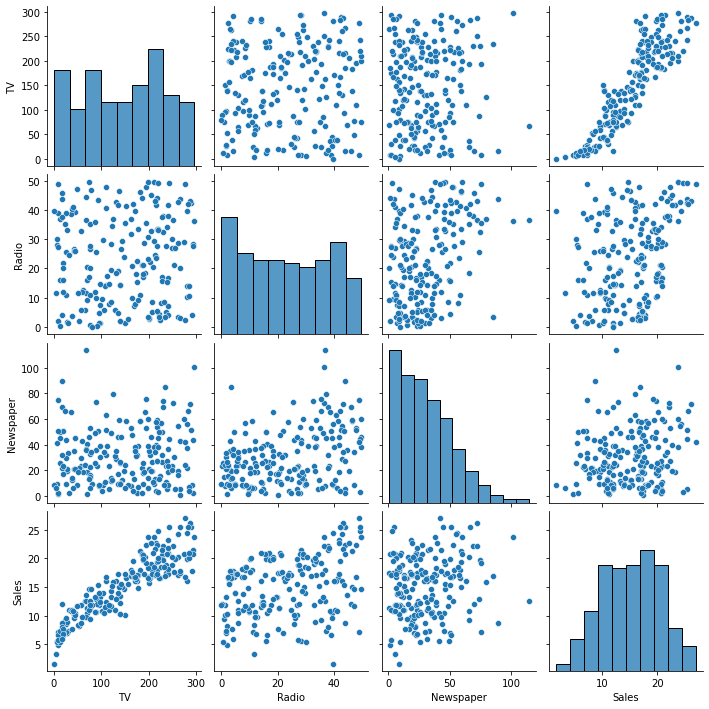

In [6]:
sns.pairplot(df)

As we can see that the scatterplot for sales and TV are somewhat linearly dependant. We will further visualise the TV and sales

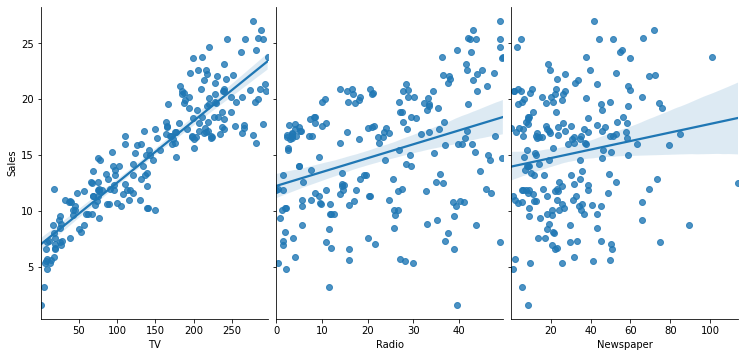

In [13]:
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', aspect = 0.7, height = 5)

From the pairplot drawn above, we can clearly see the regression line for TV and Sales. Other variables have large residuals when plotted with Sales

We can also check the correlation of TV and sales

In [44]:
df.TV.corr(df.Sales)

0.9012079133023306

<AxesSubplot:>

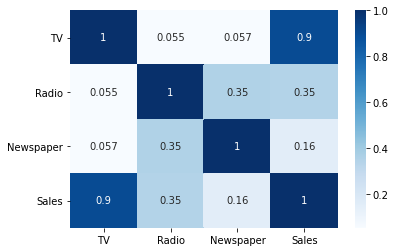

In [55]:
# We will check the correlation of each vairable with Sales
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues')

We can see that TV and sales are majorly correlated

Let's check the disrtribution of Sales and TV

/Users/priyanshsoni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

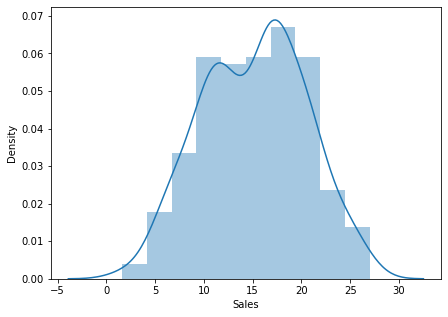

In [41]:
plt.figure(figsize = (7,5))
sns.distplot(df.Sales)

/Users/priyanshsoni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

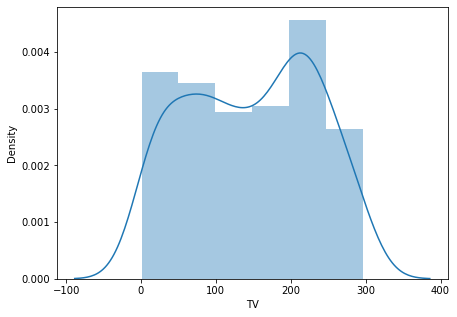

In [42]:
plt.figure(figsize = (7,5))
sns.distplot(df.TV)

# Building the Model

In [62]:
# Axis
X = df.drop('Sales', axis=1)
y = df.Sales

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [64]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [68]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [73]:
print(X_train.shape)
print(X_test.shape)

(140, 3)
(60, 3)


## Model Training

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [76]:
print(reg.intercept_)
print(reg.coef_)

4.5415187857334445
[0.0544058  0.10871216 0.0037147 ]


In [102]:
# making a DF of the coeff to get a better understanding
pd.DataFrame(reg.coef_, X.columns, columns = ['Coef'])

,Coef
TV,0.054406
Radio,0.108712
Newspaper,0.003715


## Prediction

In [114]:
predictions = reg.predict(X_test)
predictions = np.round(predictions, 1)  # rounding off values to 1 decimal place to match y_test data precision
predictions

array([12.7,  9.2,  5.4,  8.6, 15.7, 24.4, 16.6,  8.3, 19.5, 17.9,  9.9,
       10.5, 21.9, 10.4, 21.2, 17. ,  6.3, 21.4, 12.4, 11. ,  9.9, 19.4,
       11.7, 13.8,  9.7, 21.5, 12.3, 11. , 12.6, 21.2, 17.5, 14.6, 18.3,
       21.5, 12.6, 11.3,  8.8, 21.4, 18.4, 17.3,  8.9, 16.9, 12.2, 13.4,
       10.2,  5.2, 21.9, 15.2, 16.4, 12.5, 20.3, 11.8,  9.4, 22. , 13.4,
       18.1,  7.4, 17.9,  9.7, 21.2])

In [115]:
# comparing prediction and y_test
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[12.7 11.9]
 [ 9.2  9.7]
 [ 5.4  5.3]
 [ 8.6  8.4]
 [15.7 15.9]
 [24.4 24.4]
 [16.6 16.1]
 [ 8.3  8.7]
 [19.5 20.9]
 [17.9 18.4]
 [ 9.9  9.2]
 [10.5  8.7]
 [21.9 21.8]
 [10.4 10.9]
 [21.2 20. ]
 [17.  16.6]
 [ 6.3  6.9]
 [21.4 19.8]
 [12.4 14. ]
 [11.  11.3]
 [ 9.9 10.1]
 [19.4 19. ]
 [11.7 12. ]
 [13.8 12.9]
 [ 9.7  8. ]
 [21.5 16.1]
 [12.3 11.6]
 [11.  10.8]
 [12.6 12.5]
 [21.2 22.3]
 [17.5 18. ]
 [14.6 15.3]
 [18.3 16. ]
 [21.5 23.8]
 [12.6 12.6]
 [11.3 11.8]
 [ 8.8  9.4]
 [21.4 20.2]
 [18.4 18.2]
 [17.3 15. ]
 [ 8.9 11.9]
 [16.9 19.9]
 [12.2 12.4]
 [13.4 14. ]
 [10.2  9.5]
 [ 5.2  4.8]
 [21.9 24.7]
 [15.2 14.6]
 [16.4 17.2]
 [12.5 10.3]
 [20.3 19.6]
 [11.8 11. ]
 [ 9.4  7.3]
 [22.  20.2]
 [13.4 15.5]
 [18.1 17.3]
 [ 7.4  6.6]
 [17.9 17.1]
 [ 9.7  8.8]
 [21.2 21.5]]


## Evaluation Metrics

In [108]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE =', RMSE)

MAE =  1.0097893815560148
MSE =  1.9476887245446184
RMSE = 1.3955961896424833
